In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

filename = '/Users/krishshah/Desktop/Spondylolisthesis Training/test/67648d51a49561af42a794147a691e86_jpg.rf.004b082a3ea700d656eb1c53bd8d4a6c.jpg'
img = cv.imread(filename)


In [2]:
# Corner/Feature Detection Tecnniques
# https://docs.opencv.org/4.x/db/d27/tutorial_py_table_of_contents_feature2d.html

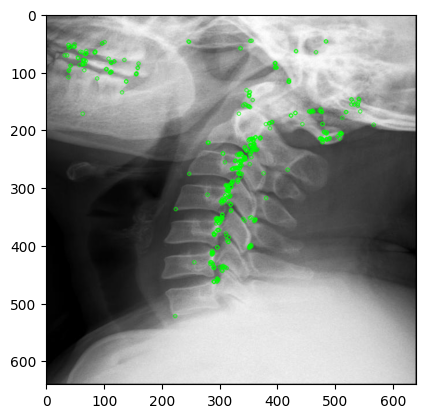

(<matplotlib.image.AxesImage at 0x11d0ad550>, None)

In [3]:
# ORB Detection
# https://docs.opencv.org/4.x/d1/d89/tutorial_py_orb.html

img2 = img.copy()

# Initiate ORB detector
orb = cv.ORB_create()

# find the keypoints with ORB
kp = orb.detect(img,None)

# compute the descriptors with ORB
kp, des = orb.compute(img, kp)

# draw only keypoints location,not size and orientation
img2 = cv.drawKeypoints(img, kp, None, color=(0,255,0), flags=0)
plt.imshow(img2), plt.show()

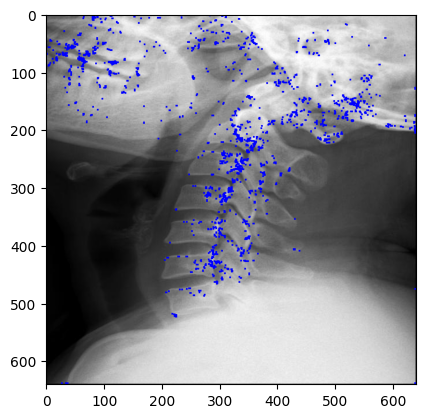

(<matplotlib.image.AxesImage at 0x11ff86350>, None)

In [4]:
# Harris Corner Detection
# https://docs.opencv.org/4.x/dc/d0d/tutorial_py_features_harris.html
img3 = img.copy()

gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

gray = np.float32(gray)
dst = cv.cornerHarris(gray,2,3,0.04)

#result is dilated for marking the corners, not important
dst = cv.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
img3[dst>0.0005*dst.max()]=[0,0,255]

plt.imshow(img3), plt.show()

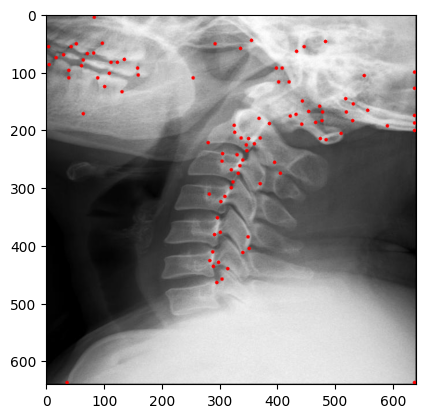

(<matplotlib.image.AxesImage at 0x12090de50>, None)

In [5]:
# Shi-Tomasi Corner Detector & Good Features to Track
# https://docs.opencv.org/4.x/d4/d8c/tutorial_py_shi_tomasi.html

img4 = img.copy()
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
 
corners = cv.goodFeaturesToTrack(gray, 100, 0.005, 10)
corners = corners.astype(int)
 
for i in corners:
    x,y = i.ravel()
    cv.circle(img4,(x,y),3,255,-1)
 
plt.imshow(img4),plt.show()

Threshold: 10
nonmaxSuppression:True
neighborhood: 2
Total Keypoints with nonmaxSuppression: 1591
Total Keypoints without nonmaxSuppression: 4236


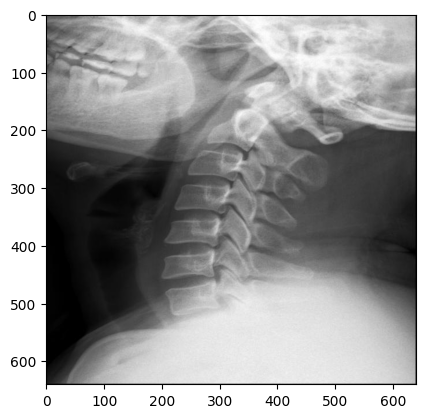

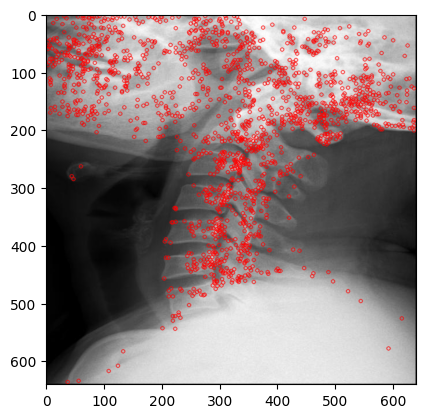

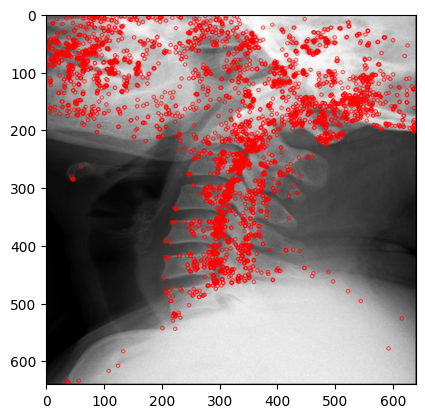

(<matplotlib.image.AxesImage at 0x120abe710>, None)

In [6]:
# FAST Algorithm for Corner Detection
# https://docs.opencv.org/4.x/d7/d8b/tutorial_py_fast.html

img5 = img

# Initiate FAST object with default values
fast = cv.FastFeatureDetector_create()

# find and draw the keypoints
kp = fast.detect(img5,None)
img6 = cv.drawKeypoints(img5, kp, None, color=(255,0,0))

# Print all default params
print( "Threshold: {}".format(fast.getThreshold()) )
print( "nonmaxSuppression:{}".format(fast.getNonmaxSuppression()) )
print( "neighborhood: {}".format(fast.getType()) )
print( "Total Keypoints with nonmaxSuppression: {}".format(len(kp)) )

cv.imwrite('fast_true.png', img6)

# Disable nonmaxSuppression
fast.setNonmaxSuppression(0)
kp = fast.detect(img, None)

print( "Total Keypoints without nonmaxSuppression: {}".format(len(kp)) )

img7 = cv.drawKeypoints(img, kp, None, color=(255,0,0))

cv.imwrite('fast_false.png', img7)

plt.imshow(img5),plt.show()
plt.imshow(img6),plt.show()
plt.imshow(img7),plt.show()

In [7]:
# Image Processing Techniques
# https://docs.opencv.org/4.x/d2/d96/tutorial_py_table_of_contents_imgproc.html 

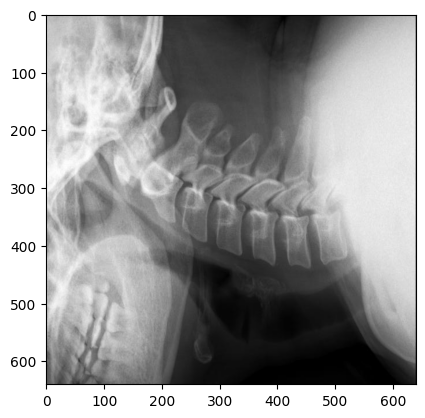

(<matplotlib.image.AxesImage at 0x120ae79d0>, None)

In [8]:
# Image Rotation
# https://docs.opencv.org/4.x/d6/d6e/tutorial_py_geometric_transformations.html

img8 = img.copy()
assert img is not None, "file could not be read, check with os.path.exists()"
rows,cols = img8.shape[:2]
 
# cols-1 and rows-1 are the coordinate limits.
M = cv.getRotationMatrix2D(((cols-1)/2.0,(rows-1)/2.0),90,1)
dst = cv.warpAffine(img,M,(cols,rows))
plt.imshow(dst), plt.show()

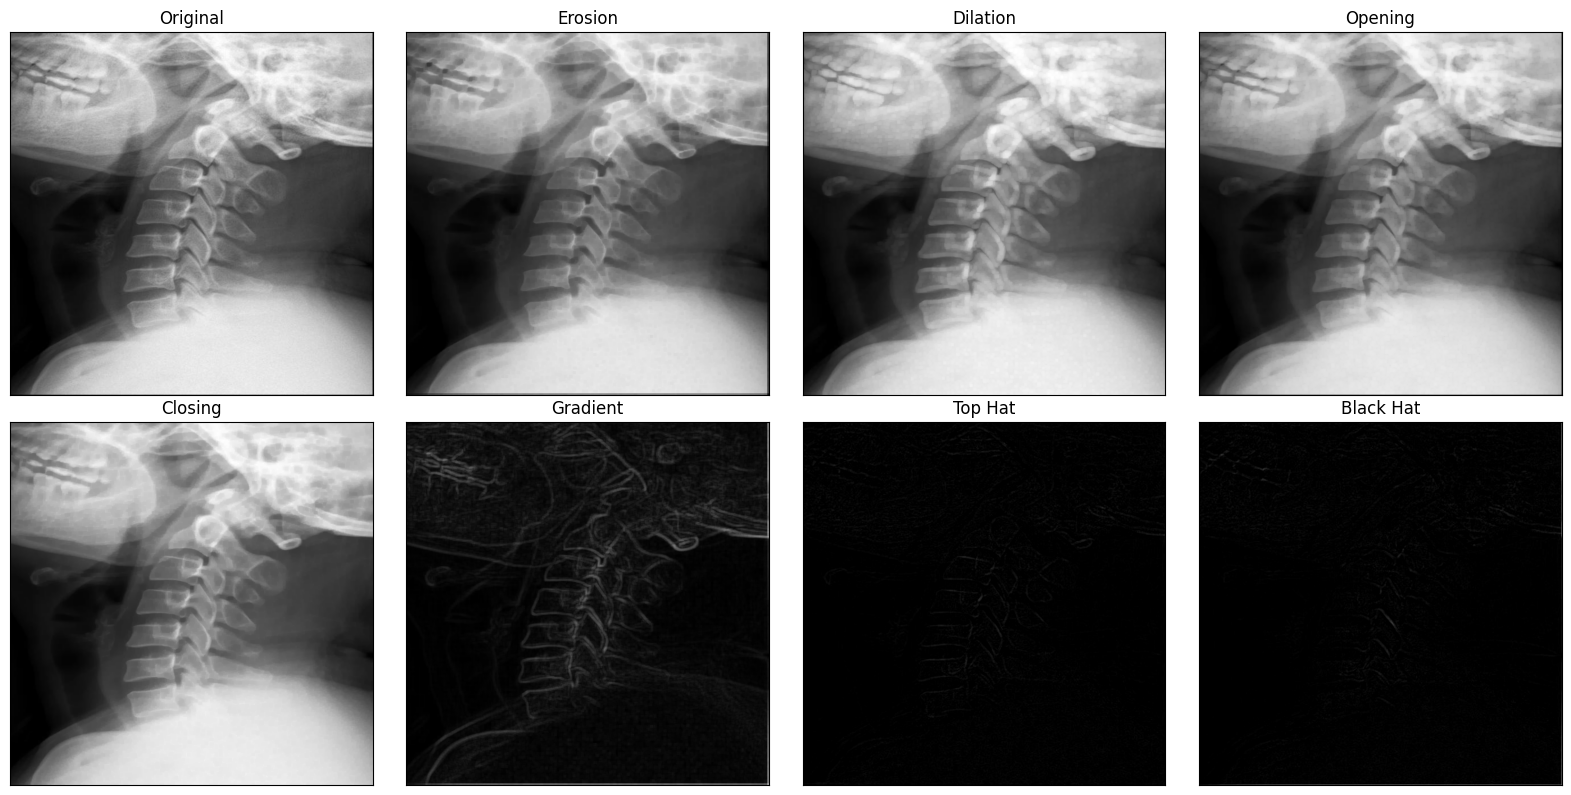

In [9]:
# Morphological Transformations
# https://docs.opencv.org/4.x/d9/d61/tutorial_py_morphological_ops.html

# Erosion
img16 = img.copy()
assert img16 is not None, "file could not be read, check with os.path.exists()"
kernel = np.ones((5,5),np.uint8)
erosion = cv.erode(img, kernel, iterations=1)

# Dilation
img17 = img.copy()
assert img17 is not None, "file could not be read, check with os.path.exists()"
dilation = cv.dilate(img, kernel, iterations=1)

# Opening - Erosion followed by Dilation
img18 = img.copy()
assert img18 is not None, "file could not be read, check with os.path.exists()"
opening = cv.morphologyEx(img, cv.MORPH_OPEN, kernel)

# Closing - Dilation followed by Erosion
img19 = img.copy()
assert img19 is not None, "file could not be read, check with os.path.exists()"
closing = cv.morphologyEx(img, cv.MORPH_CLOSE, kernel)

# Gradient - Dilation minus Erosion (decently successful with grayscale images)
img20 = img.copy()
assert img20 is not None, "file could not be read, check with os.path.exists()"
gradient = cv.morphologyEx(img, cv.MORPH_GRADIENT, kernel)

# Top Hat - Original Image minus Opening (Does not work with grayscale images)
img21 = img.copy()
assert img21 is not None, "file could not be read, check with os.path.exists()"
tophat = cv.morphologyEx(img, cv.MORPH_TOPHAT, kernel)

# Black Hat - Closing minus Original Image (Does not work with grayscale images)
img22 = img.copy()
assert img22 is not None, "file could not be read, check with os.path.exists()"
blackhat = cv.morphologyEx(img, cv.MORPH_BLACKHAT, kernel)

# Show all results in one bigger plot for easy comparison
titles = [
    'Original', 
    'Erosion', 
    'Dilation', 
    'Opening', 
    'Closing', 
    'Gradient', 
    'Top Hat', 
    'Black Hat'
]
images = [
    img, 
    erosion, 
    dilation, 
    opening, 
    closing, 
    gradient, 
    tophat, 
    blackhat
]

plt.figure(figsize=(16, 8))
for i in range(len(images)):
    plt.subplot(2, 4, i+1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.tight_layout()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-191.0..328.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-4253.0..2660.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-4557.0..3291.0].


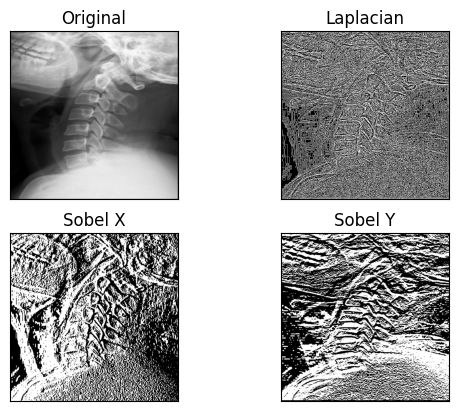

In [10]:
# Image Gradients
# https://docs.opencv.org/4.x/d5/d0f/tutorial_py_gradients.html

img9 = img.copy()
assert img9 is not None, "file could not be read, check with os.path.exists()"

laplacian = cv.Laplacian(img9,cv.CV_64F)
sobelx = cv.Sobel(img9,cv.CV_64F,1,0,ksize=5)
sobely = cv.Sobel(img9,cv.CV_64F,0,1,ksize=5)

plt.subplot(2,2,1),plt.imshow(img9,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()

# does not work - neither filter shows accurate gradients

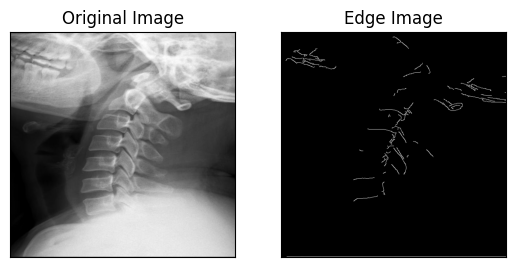

In [11]:
# Canny Edge Detection
# https://docs.opencv.org/4.x/da/d22/tutorial_py_canny.html

img10 = img.copy()
assert img10 is not None, "file could not be read, check with os.path.exists()"
edges = cv.Canny(img,100,200)

plt.subplot(121),plt.imshow(img10,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

# does not work - need colour images to see edges clearly

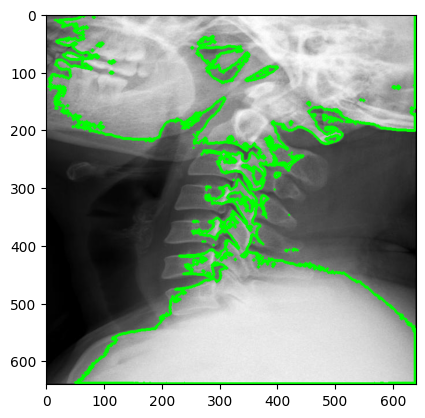

(<matplotlib.image.AxesImage at 0x120a41950>, None)

In [12]:
# Contours
# https://docs.opencv.org/4.x/d4/d73/tutorial_py_contours_begin.html

img11 = img.copy()
assert img11 is not None, "file could not be read, check with os.path.exists()"
imgray = cv.cvtColor(img11, cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(imgray, 127, 255, 0)
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
cv.drawContours(img11, contours, -1, (0,255,0), 3)
plt.imshow(img11), plt.show()

# does not work - need colour images to see contours clearly
# (the contours are drawn in green, but the image is grayscale)

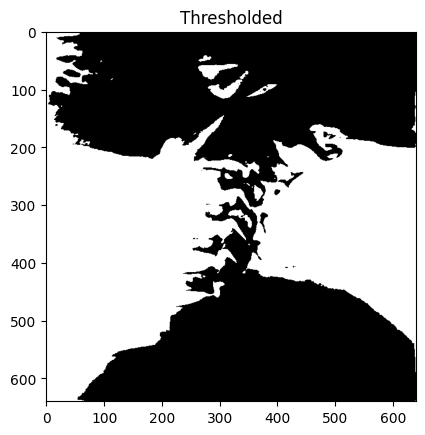

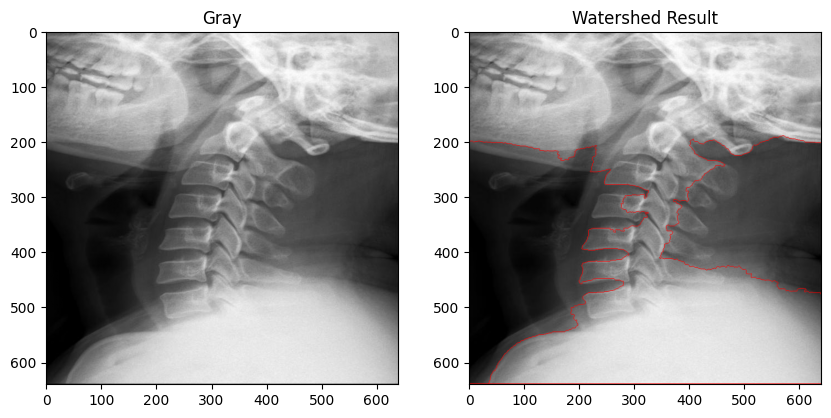

In [13]:
# Image Segmentation with Watershed Algorithm
# https://docs.opencv.org/4.x/d3/db4/tutorial_py_watershed.html

img12 = img.copy()
assert img12 is not None, "file could not be read, check with os.path.exists()"
gray = cv.cvtColor(img12, cv.COLOR_BGR2GRAY)

# 1. Apply Gaussian Blur to reduce noise
blur = cv.GaussianBlur(gray, (5, 5), 0)

# 2. Use Otsu's thresholding (try both INV and normal)
ret, thresh = cv.threshold(blur, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)
plt.imshow(thresh, cmap='gray'), plt.title('Thresholded'), plt.show()

# 3. Morphological opening to remove small noise
kernel = np.ones((3, 3), np.uint8)
opening = cv.morphologyEx(thresh, cv.MORPH_OPEN, kernel, iterations=2)

# 4. Sure background area (dilate)
sure_bg = cv.dilate(opening, kernel, iterations=3)

# 5. Sure foreground area (distance transform + threshold)
dist_transform = cv.distanceTransform(opening, cv.DIST_L2, 5)
ret, sure_fg = cv.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)  # Try 0.5-0.7

# 6. Unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg, sure_fg)

# 7. Marker labelling
ret, markers = cv.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0

# 8. Apply watershed
markers = cv.watershed(img12, markers)
img12[markers == -1] = [255, 0, 0]  # Mark boundaries in red

# 9. Show results
plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(gray, cmap='gray'), plt.title('Gray')
plt.subplot(122), plt.imshow(img12), plt.title('Watershed Result')
plt.show()

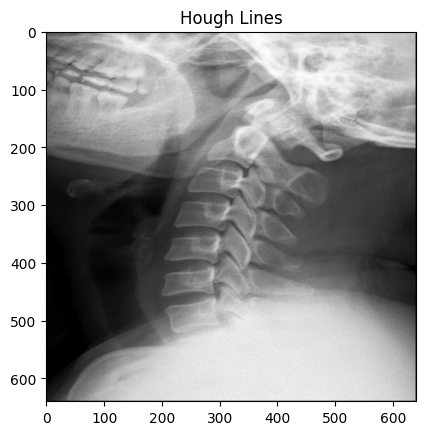

(<matplotlib.image.AxesImage at 0x126894b90>,
 Text(0.5, 1.0, 'Hough Lines'),
 None)

In [14]:
# Hough Line Transform
# https://docs.opencv.org/4.x/d6/d10/tutorial_py_houghlines.html

img13 = img.copy()
assert img13 is not None, "file could not be read, check with os.path.exists()"
gray = cv.cvtColor(img13,cv.COLOR_BGR2GRAY)   
edges = cv.Canny(gray,50,150,apertureSize = 3)

lines = cv.HoughLines(edges,1,np.pi/180,200)
for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv.line(img,(x1,y1),(x2,y2),(0,0,255),2)

cv.imwrite('houghlines3.jpg',img)

plt.imshow(img13), plt.title('Hough Lines'), plt.show()

# does not work - no lines detected

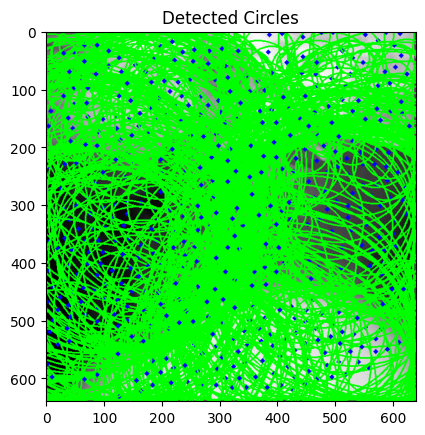

In [15]:
# Hough Circle Transform
# https://docs.opencv.org/4.x/da/d53/tutorial_py_houghcircles.html
# Note: This requires a grayscale image, so we will convert the original image to grayscale first
# and then apply median blur to reduce noise before detecting circles.
# Ensure the image is read correctly and exists.
# If the image is not found, an assertion error will be raised.
# Also, ensure that the image is in grayscale format before applying HoughCircles.

img15 = img.copy()
assert img15 is not None, "file could not be read, check with os.path.exists()"
img15_gray = cv.cvtColor(img15, cv.COLOR_BGR2GRAY)  # Convert to grayscale
img15_blur = cv.medianBlur(img15_gray, 5)
cimg = cv.cvtColor(img15_blur, cv.COLOR_GRAY2BGR)

circles = cv.HoughCircles(img15_blur, cv.HOUGH_GRADIENT, 1, 20,
                          param1=50, param2=30, minRadius=0, maxRadius=0)

if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        # draw the outer circle
        cv.circle(cimg, (i[0], i[1]), i[2], (0, 255, 0), 2)
        # draw the center of the circle
        cv.circle(cimg, (i[0], i[1]), 2, (0, 0, 255), 3)

    plt.imshow(cimg)
    plt.title('Detected Circles')
    plt.show()
else:
    print("No circles were detected.")

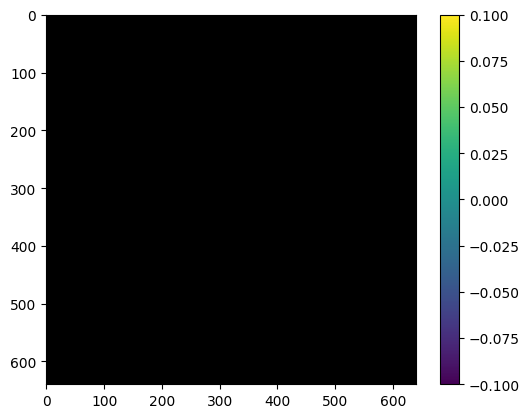

(<matplotlib.image.AxesImage at 0x1267a39d0>,
 None)

In [16]:
# Interactive Foreground Extraction using GrabCut Algorithm
# https://docs.opencv.org/4.x/d8/d83/tutorial_py_grabcut.html

img14 = img.copy()
assert img14 is not None, "file could not be read, check with os.path.exists()"
mask = np.zeros(img14.shape[:2],np.uint8)

bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

rect = (50,50,450,290)
cv.grabCut(img14,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)

mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img14 = img14*mask2[:,:,np.newaxis]

plt.imshow(img14),plt.colorbar(),plt.show()

# does not work - entire picture is already too dark